# Loan Prediction
## Binary Classification using Logistic Regression

# 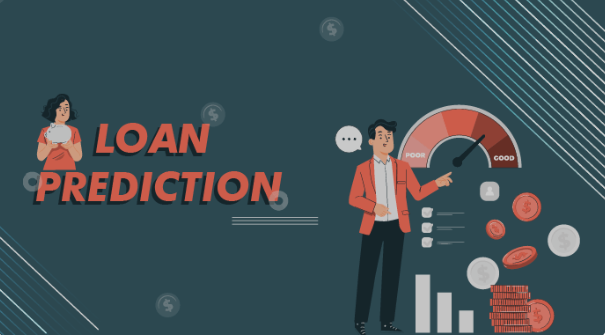

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
df= pd.read_csv('Loan_Data.csv')


In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [37]:
df.shape

(614, 13)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Cleaning

In [40]:
print(df.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Loan_ID'] = le.fit_transform(df['Loan_ID'])






df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [42]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mean())
df['Married'] = df['Married'].fillna(df['Married'].mean())
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mean())
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mean())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

print(df.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [43]:
df.duplicated().sum()

0

In [44]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [45]:
df['Gender'].value_counts()

1    489
0    112
2     13
Name: Gender, dtype: int64

## Exploratory Data Analyis

<Axes: title={'center': 'Gender'}, xlabel='Gender', ylabel='count'>

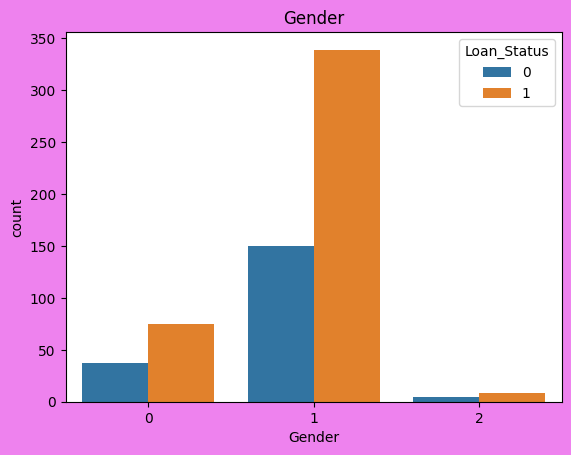

In [46]:
plt.figure(facecolor='violet')
plt.title('Gender')
sns.countplot(x='Gender',data=df,hue='Loan_Status')

<Axes: title={'center': 'sysBP vs diaBP'}, xlabel='Gender', ylabel='Loan_Status'>

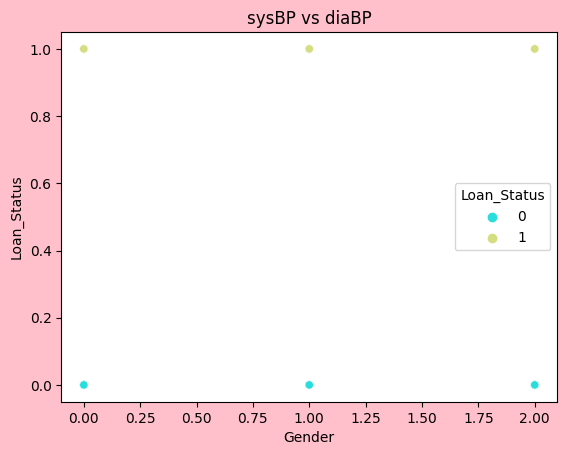

In [47]:
plt.figure(facecolor='Pink')
plt.title('sysBP vs diaBP')
sns.scatterplot(data=df,x='Gender',y='Loan_Status',hue='Loan_Status',alpha=0.8,palette='rainbow')

<Axes: xlabel='Education', ylabel='Loan_Status'>

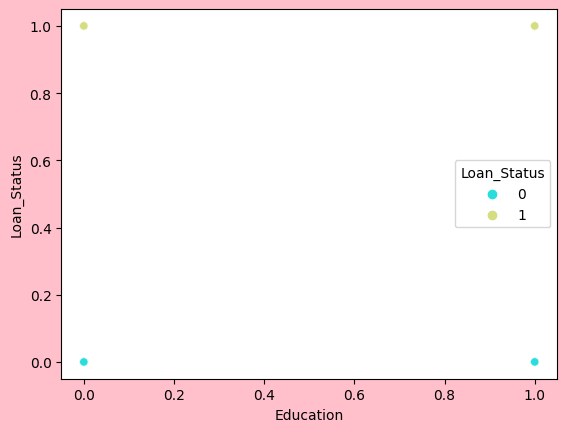

In [48]:
plt.figure(facecolor='Pink')

sns.scatterplot(data=df,x='Education',y='Loan_Status',hue='Loan_Status',alpha=0.8,palette='rainbow')

<Axes: xlabel='Married', ylabel='Gender'>

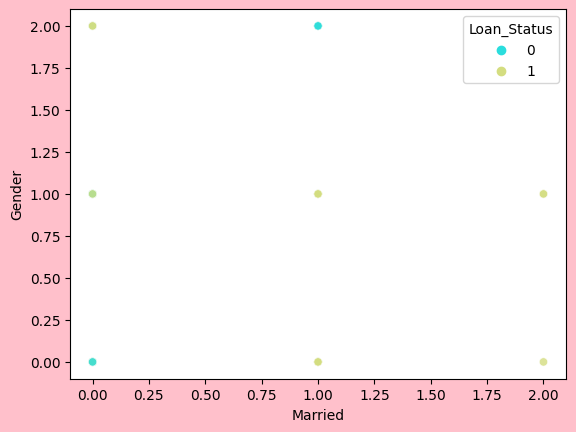

In [69]:
plt.figure(facecolor='Pink')

sns.scatterplot(data=df,x='Married',y='Gender',hue='Loan_Status',alpha=0.8,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='Loan_Status'>

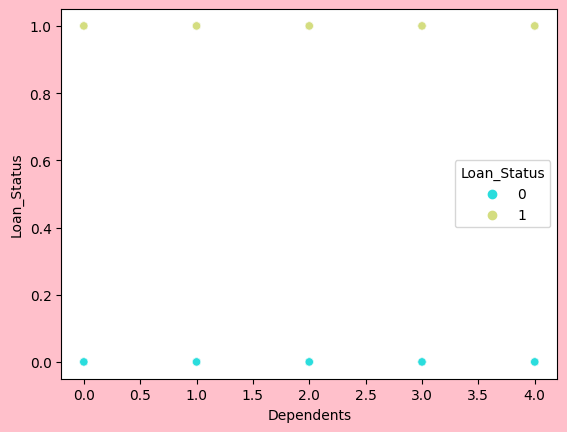

In [50]:
plt.figure(facecolor='Pink')

sns.scatterplot(data=df,x='Dependents',y='Loan_Status',hue='Loan_Status',alpha=0.8,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='Loan_Status'>

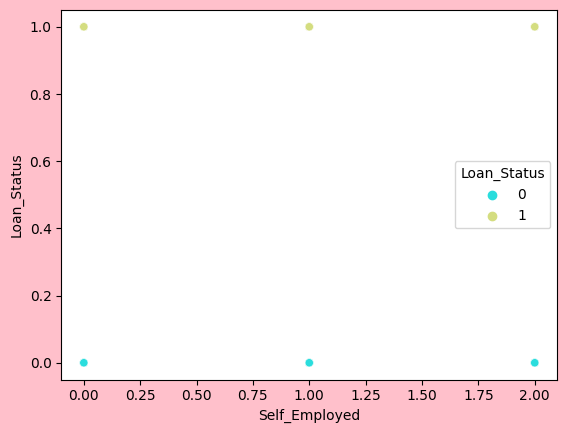

In [51]:
plt.figure(facecolor='Pink')

sns.scatterplot(data=df,x='Self_Employed',y='Loan_Status',hue='Loan_Status',alpha=0.8,palette='rainbow')

In [52]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.055139,0.039442,0.005039,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.055139,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.039442,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.016925,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.067778,-0.096253,-0.073683,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


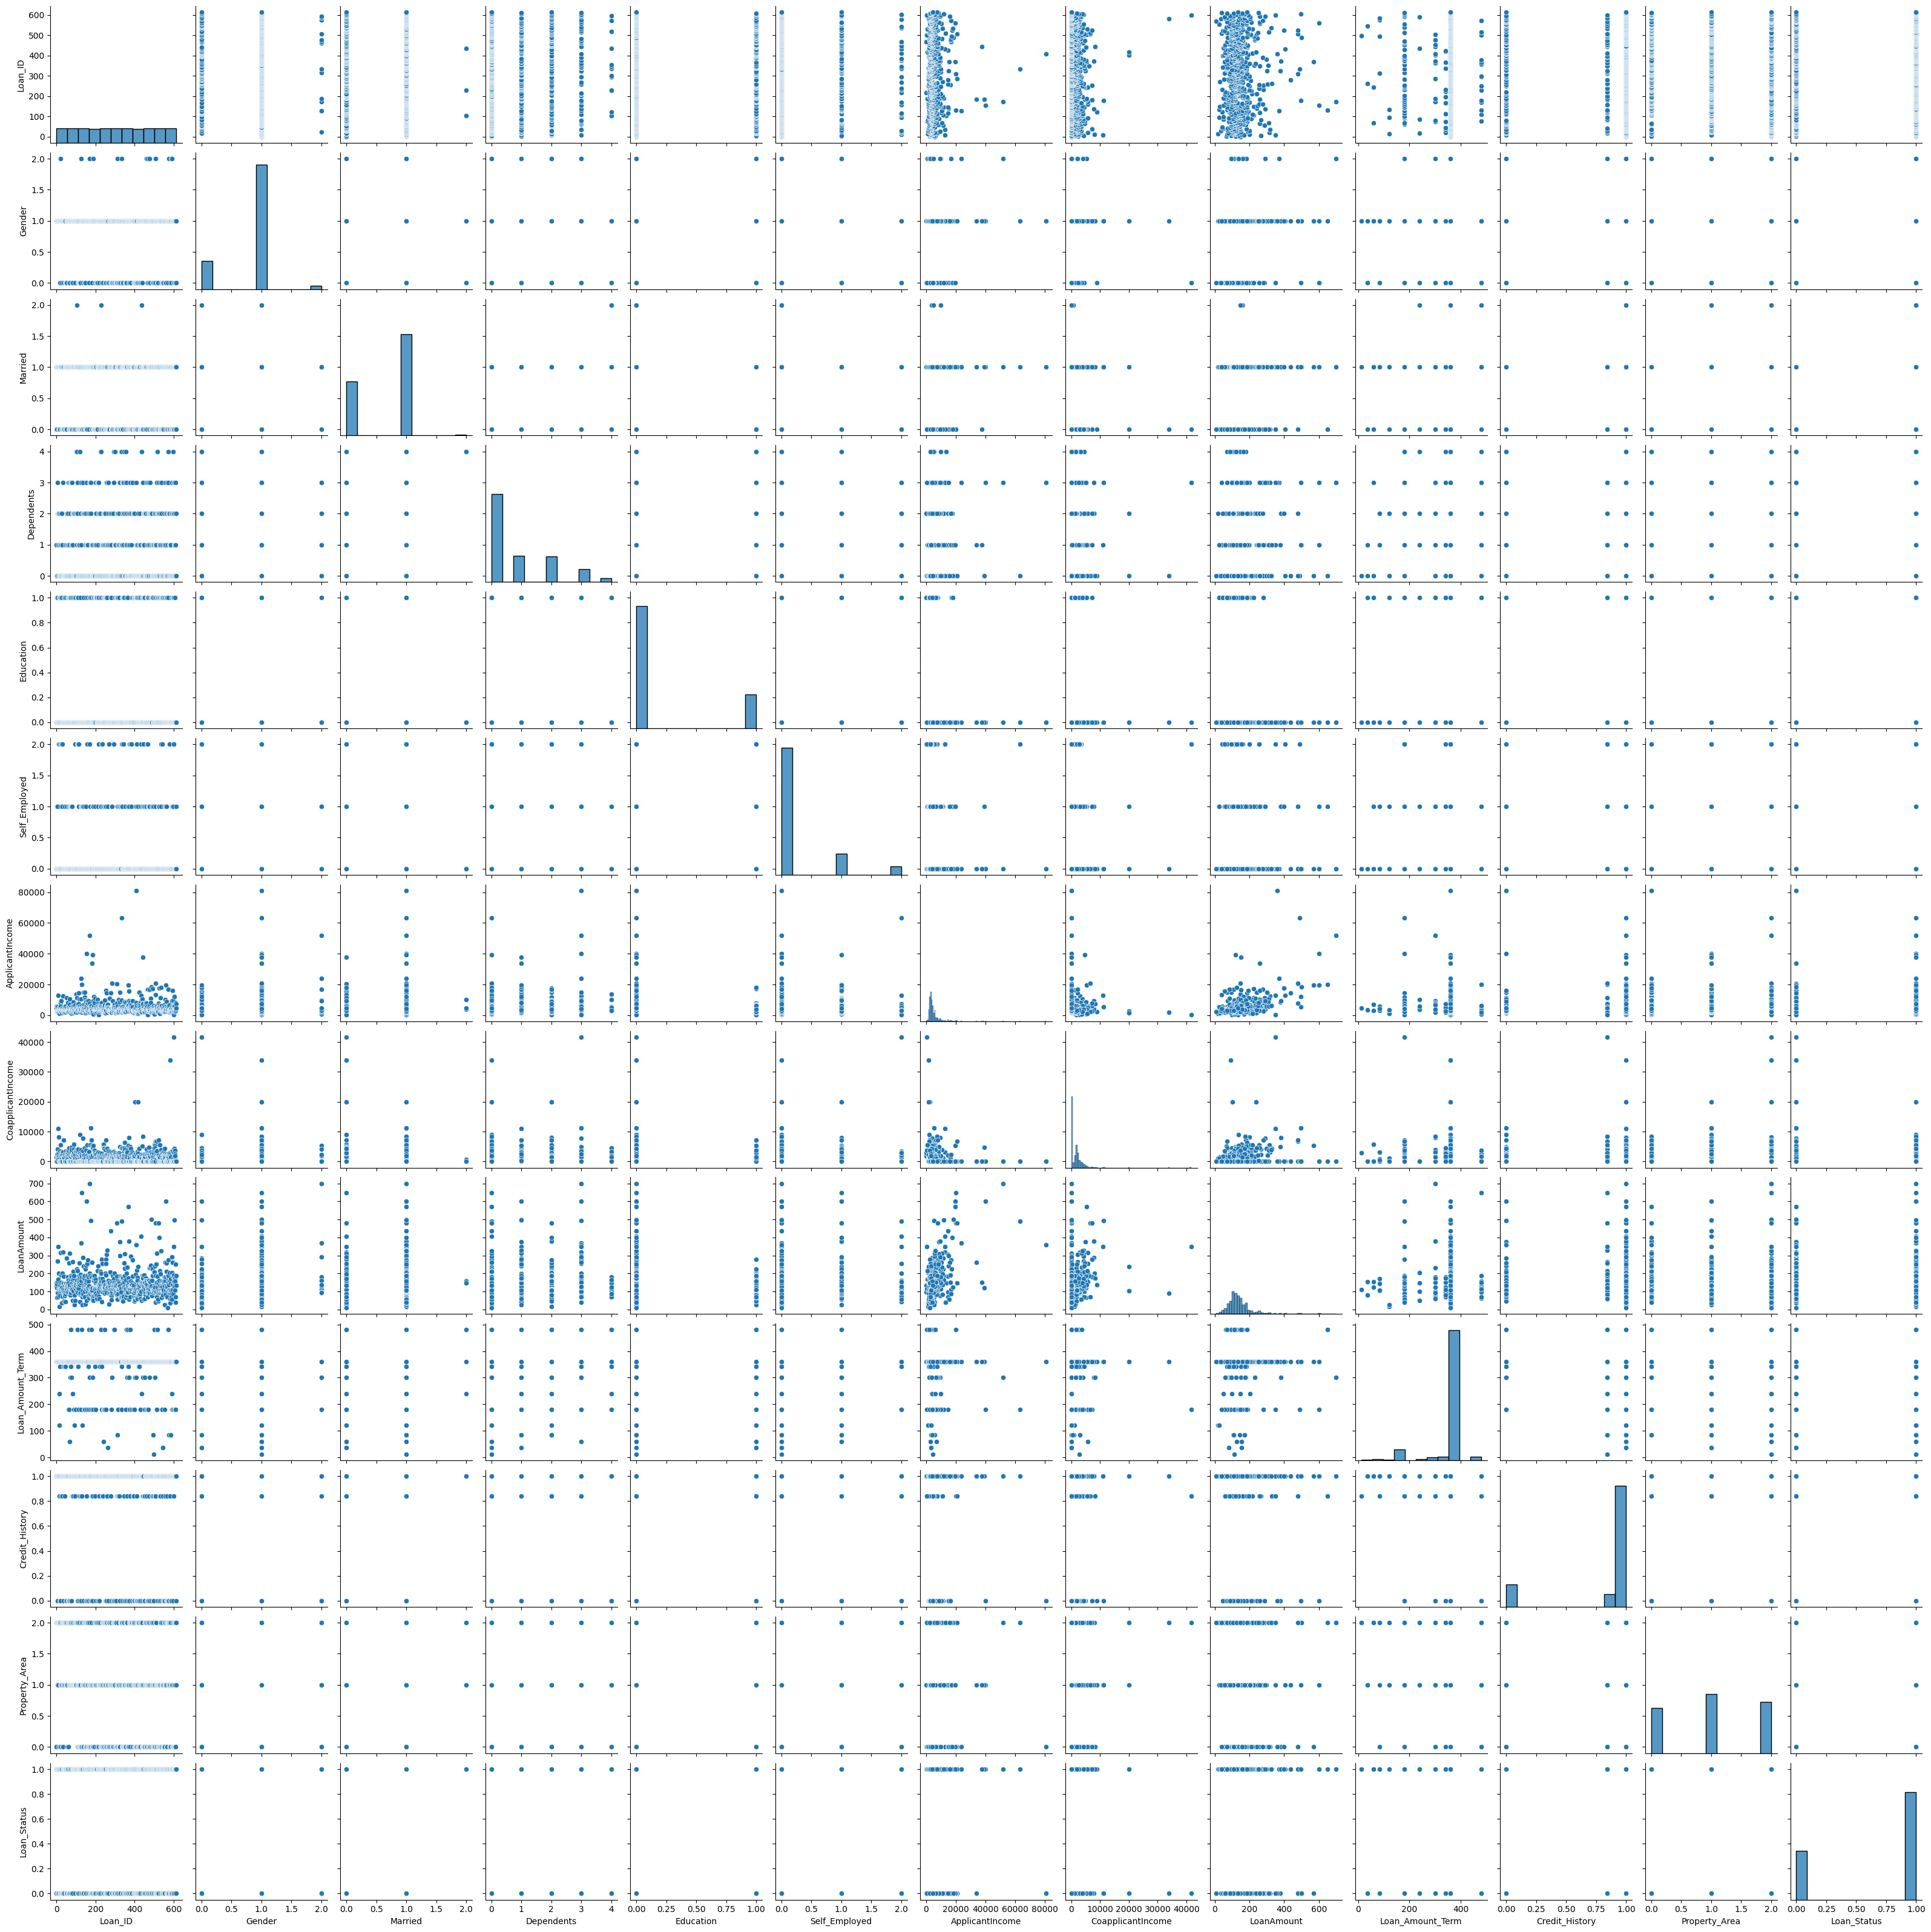

In [53]:
sns.pairplot(df)

In [54]:
df.shape

(614, 13)

In [55]:
df_corr=df.corr()

In [56]:
import numpy as np

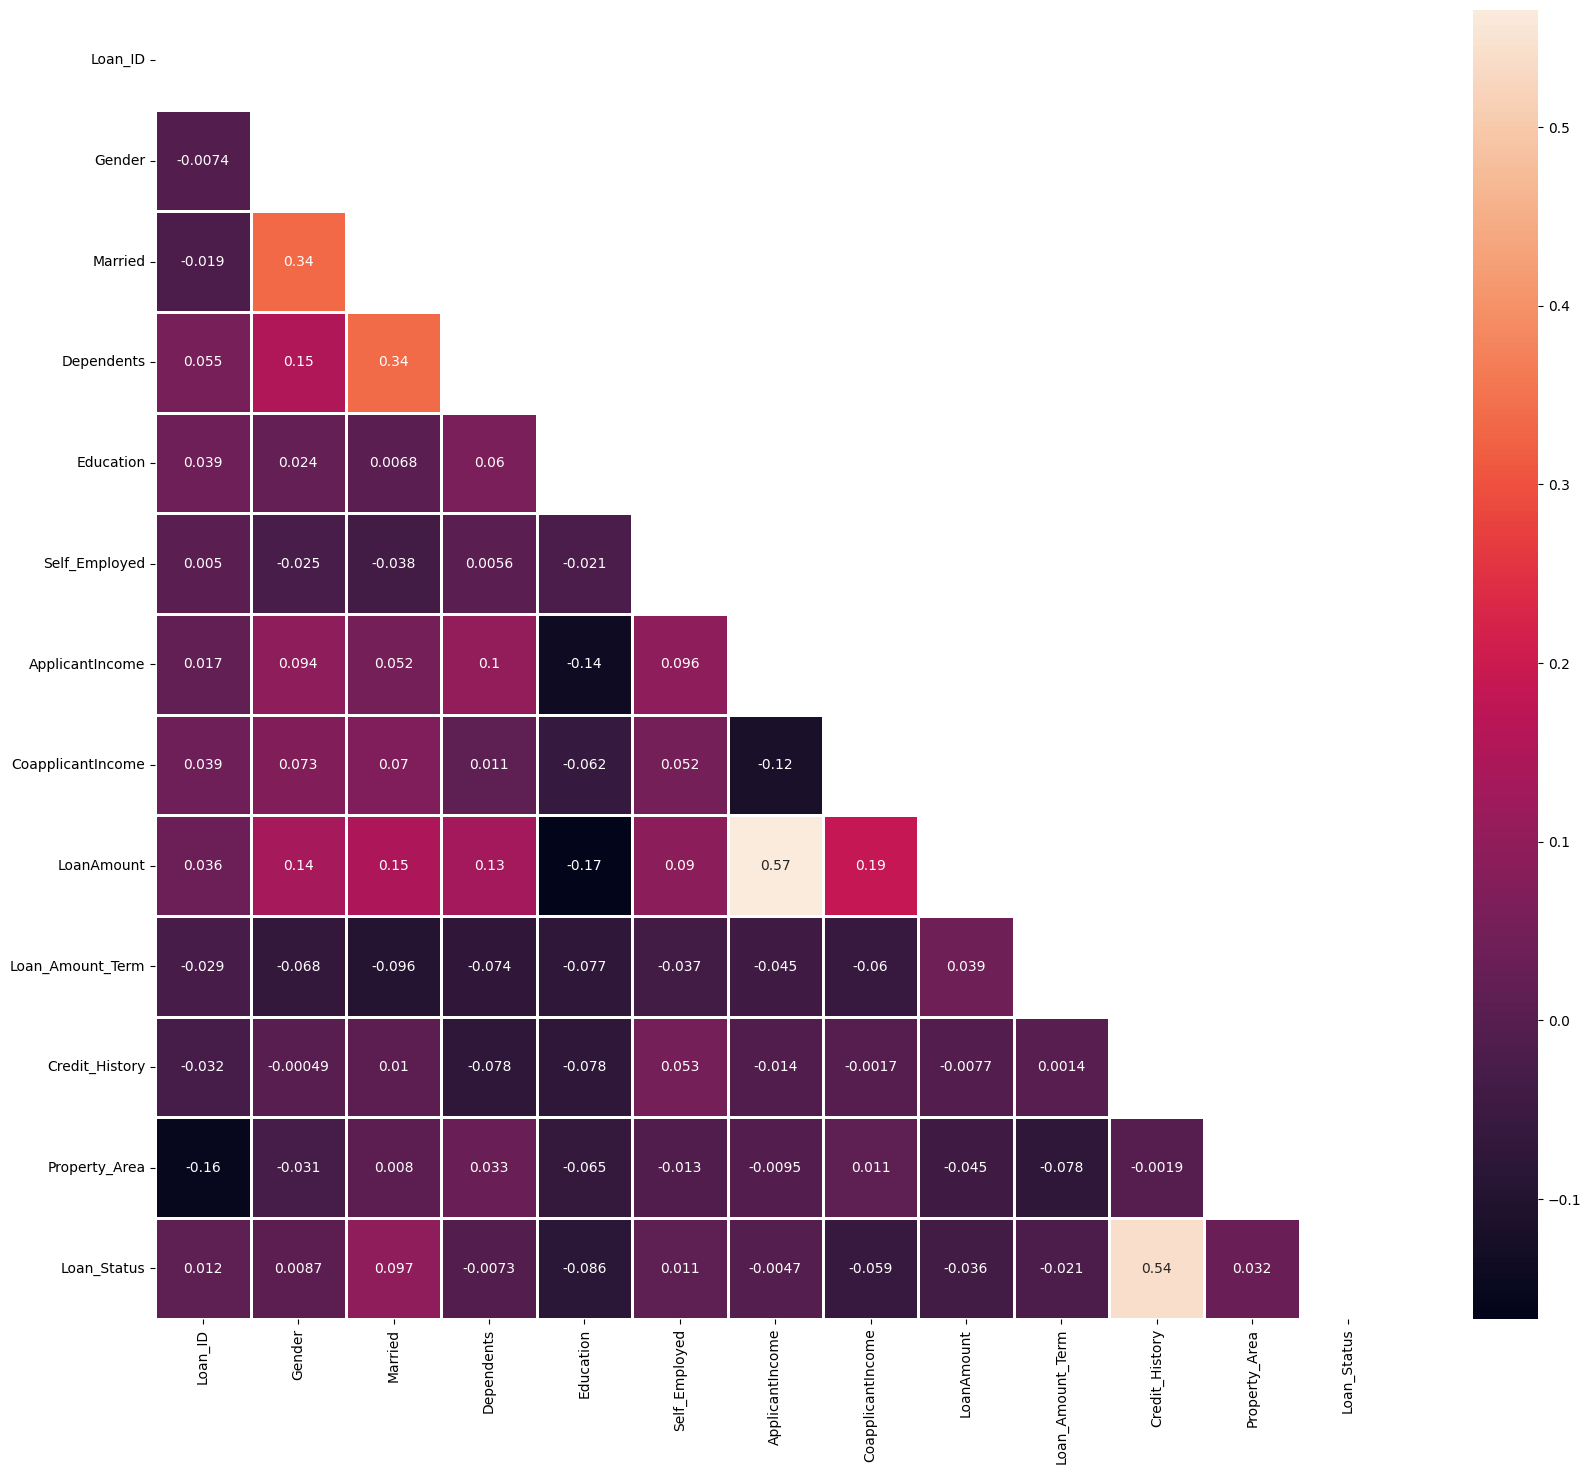

In [57]:
plt.figure(figsize=(20,17))
matrix=np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap='rocket');
plt.show()

<Axes: >

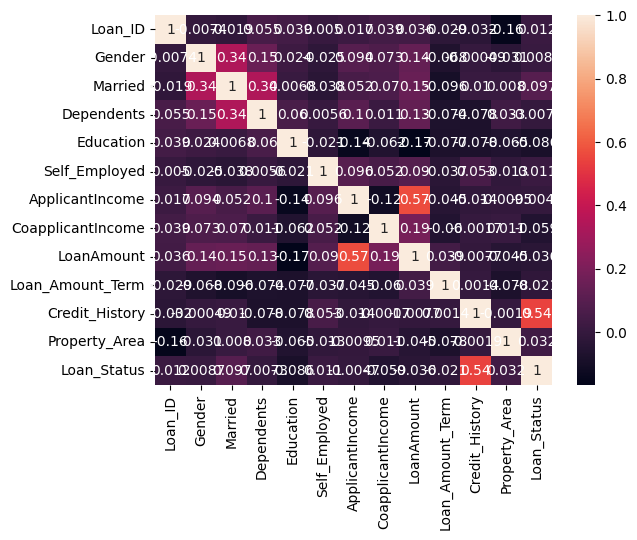

In [58]:
sns.heatmap(df.corr(),annot=True)

In [59]:
x = df.drop(columns='Loan_Status',axis=1)
y = df['Loan_Status']


In [60]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=0)

In [61]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [62]:
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(491, 12) (123, 12) (491,) (123,)


In [63]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

reg.fit(x_train,y_train)


LogisticRegression()

In [64]:
y_pred=reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [65]:
from sklearn.metrics import r2_score,accuracy_score

In [66]:
r2_score(y_test,y_pred)

0.17171717171717182

In [67]:
print(accuracy_score(y_test,y_pred))

0.8373983739837398


In [68]:
reg.score(x_test,y_test)

0.8373983739837398

# Conclusion:

1. The Loan Status is heavily dependent on the Credit History for Predictions.
2. The Logistic Regression algorithm gives us the maximum Accuracy (83% approx) compared to the other Machine Learning Classification Algorithms.